In [57]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')
DRIVE_PATH = "/content/gdrive/My Drive/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 30
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 50   # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 15000000   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.5

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)
# blobDetector = cv2.SimpleBlobDetector()


In [0]:
objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
  for y in range(0, 4):
    objp[4*x+y] = (x*36, y*72 + (x%2)*36, 0)

In [69]:
objpoints = None # 3d point in real world space
imgpoints = None # 2d points in image plane.


for f in range(1,12):
  s = DRIVE_PATH +"photo_%02d.jpg" % f
  img = cv2.imread(s)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, corners = cv2.findCirclesGrid(gray, (4,11),
                        flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING,
                                     blobDetector = blobDetector)   # Find the circle grid

  if corners is not None and ret:
    objpoints = np.array([objp]) if objpoints is None else np.append(objpoints, [objp], axis = 0)
    imgpoints = np.array([corners]) if imgpoints is None else np.append(imgpoints, [corners], axis = 0)
  else:
    print("Skip photo_%02d.jpg" % f)


print(objpoints.shape)
print(imgpoints.shape)
(i1, i2, i3, i4) = imgpoints.shape;
imgpoints = imgpoints.reshape([i1, i2, i4])
print(imgpoints.shape)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(mtx)
print(dist)



(11, 44, 3)
(11, 44, 1, 2)
(11, 44, 2)
[[3.61741992e+03 0.00000000e+00 2.34418939e+03]
 [0.00000000e+00 3.61436689e+03 1.74785529e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.1289116  -0.1896316  -0.00221877 -0.00024593 -0.12020225]]


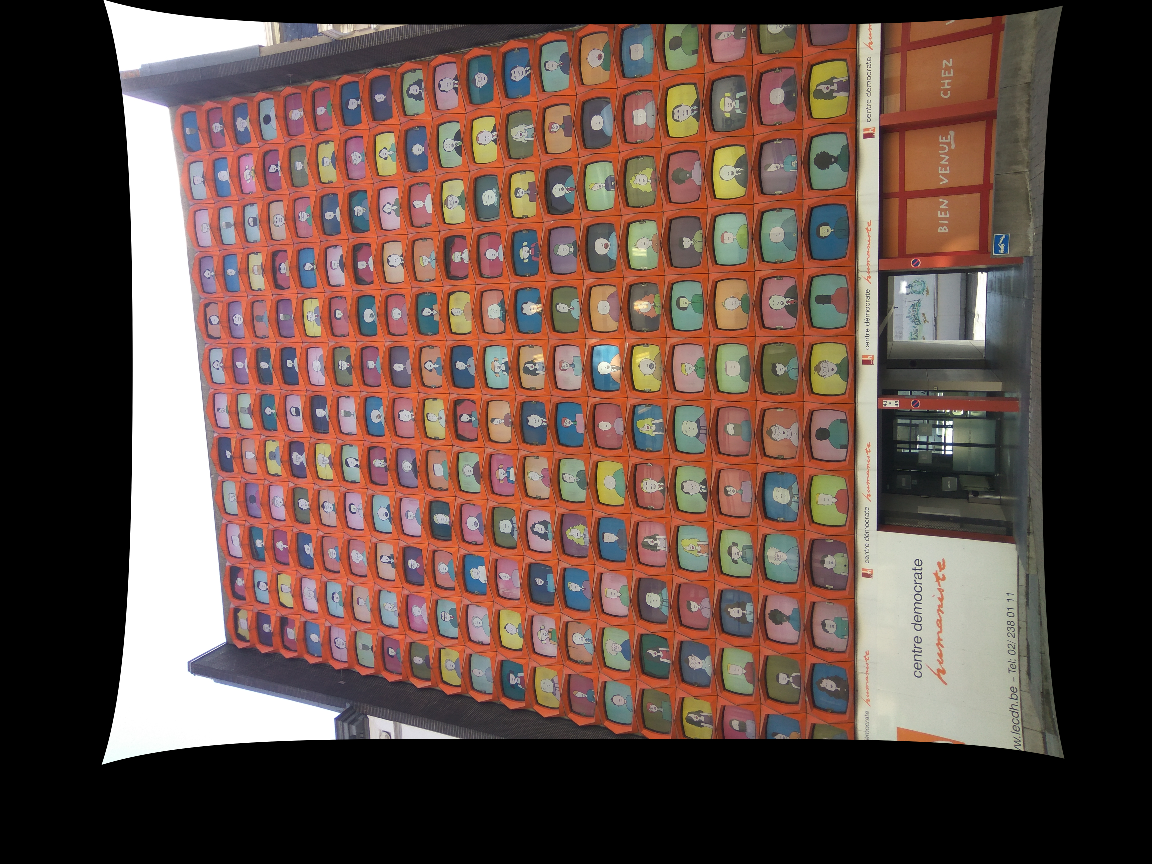

In [71]:
s = DRIVE_PATH + "calibr_test.jpg"
test = cv2.imread(s)

(w,h) = test.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)
dst = cv2.resize(dst, (0,0), fx=0.25, fy=0.25) 
cv2_imshow(dst)